In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.dropna(subset=['RainTomorrow'], inplace=True)

## Creating Training ,Validation and Test dataset

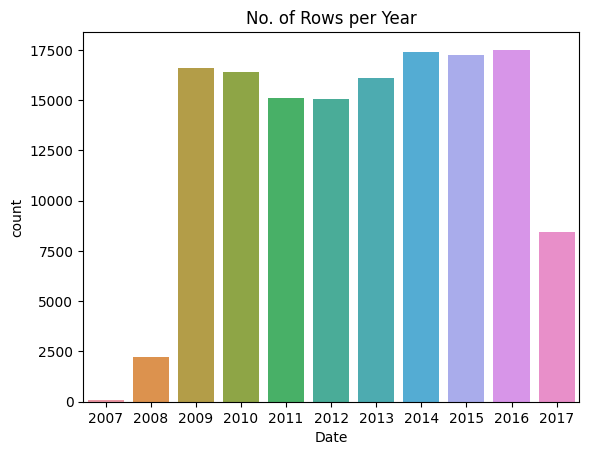

In [4]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);
plt.show()

In [5]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]



print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)


train_targets=train_df['RainTomorrow']
val_targets=val_df['RainTomorrow']
test_targets=test_df['RainTomorrow']


train_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);
val_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);
test_df.drop(['RainTomorrow','Date'],axis=1,inplace=True);

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
numeric_cols = train_df.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_df.select_dtypes('object').columns.tolist()

## Imputer to fill missing data 

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean');
imputer.fit(df[numeric_cols]);
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols]);
val_df[numeric_cols]=imputer.transform(val_df[numeric_cols]);
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols]);

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

## Scaling features using MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[numeric_cols]);
train_df[numeric_cols]=scaler.transform(train_df[numeric_cols])
val_df[numeric_cols]=scaler.transform(val_df[numeric_cols])
test_df[numeric_cols]=scaler.transform(test_df[numeric_cols])

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

## One-Hot Encoder

In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])
encoded_cols=list(encoder.get_feature_names(categorical_cols))
train_df[encoded_cols]=encoder.transform(train_df[categorical_cols]);
val_df[encoded_cols]=encoder.transform(val_df[categorical_cols]);
test_df[encoded_cols]=encoder.transform(test_df[categorical_cols]);

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [10]:
train_df=train_df[numeric_cols+encoded_cols]
val_df=val_df[numeric_cols+encoded_cols]
test_df=test_df[numeric_cols+encoded_cols]

In [11]:
train_df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

## Decision Trees

In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = DecisionTreeClassifier(max_depth=13, random_state=42)
model.fit(train_df, train_targets)
model.score(train_df, train_targets)
# Alternate statement for score
#accuracy_score(model.predict(train_df),train_targets)

Wall time: 4.25 s


0.8976340566533317

In [13]:
model.predict_proba(train_df)

array([[0.95722772, 0.04277228],
       [0.95722772, 0.04277228],
       [0.95722772, 0.04277228],
       ...,
       [0.95722772, 0.04277228],
       [0.95722772, 0.04277228],
       [0.89230769, 0.10769231]])

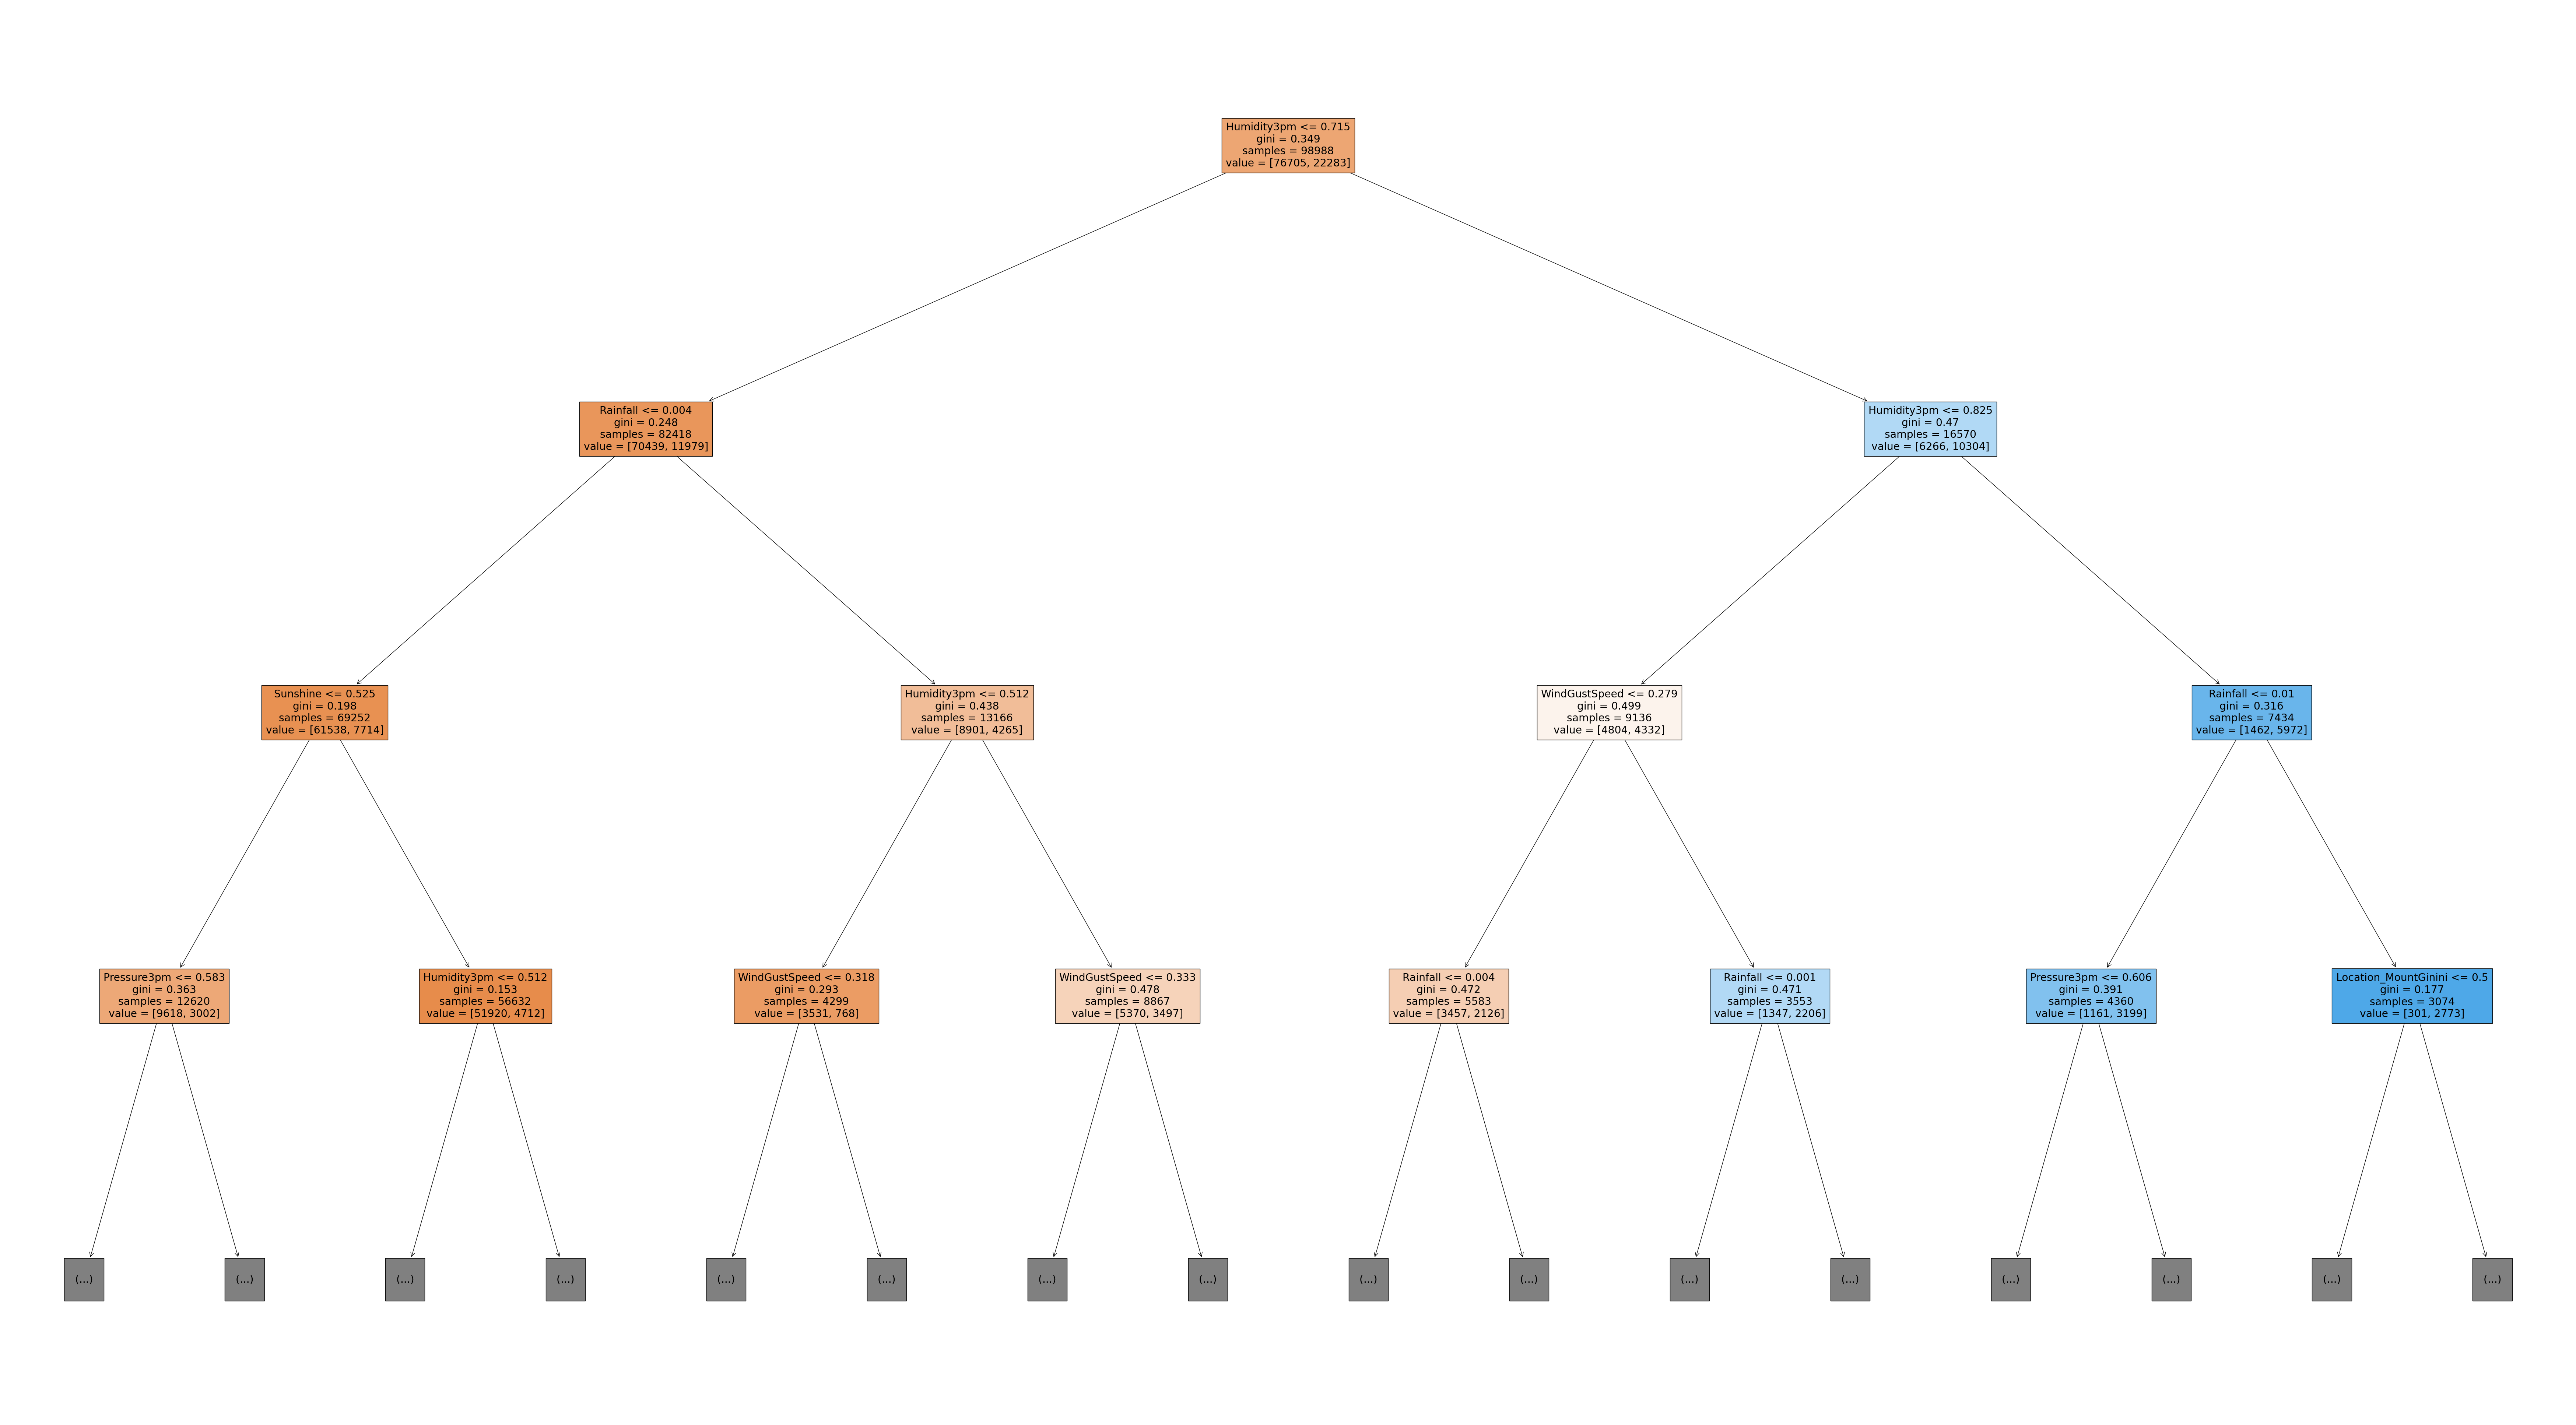

In [14]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(90,50))
plot_tree(model, feature_names=train_df.columns, max_depth=3, filled=True);
plt.show()

In [15]:
# Alternate visualisation
tree_text = export_text(model, max_depth=10, feature_names=list(train_df.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

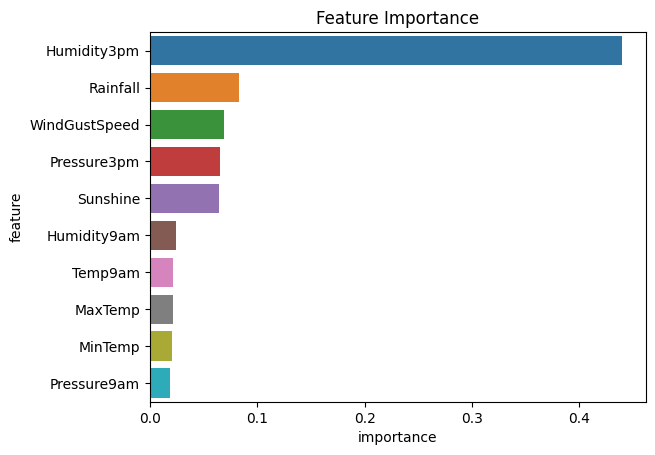

In [16]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.show()

In [17]:
model.score(val_df,val_targets)

0.833962045151181

Lets see relationship b/w max_depth and train_score and val_score

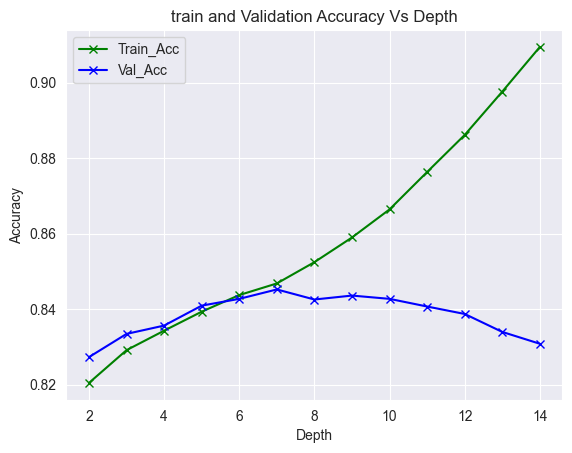

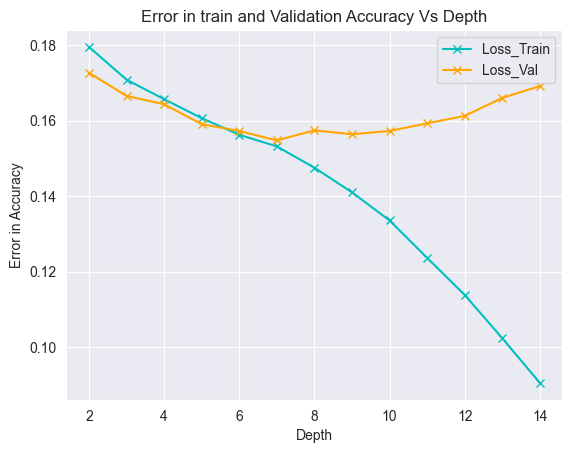

In [18]:
def max_depth(min,max):
    depth=[]
    tr_ac=[]
    va_ac=[]
    for i in range(min,max+1,1):
        model = DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(train_df, train_targets)
        # print('train_accuracy:',model.score(train_df, train_targets))
        # print('val_accuracy:',model.score(val_df, val_targets))
        depth.append(i)
        tr_ac.append(model.score(train_df, train_targets))
        va_ac.append(model.score(val_df, val_targets))
    sns.set_style('darkgrid')
    plt.title('train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Accuracy')
    plt.plot(depth,tr_ac,'gx-')
    plt.plot(depth,va_ac,'bx-')
    plt.legend(['Train_Acc','Val_Acc']);
    plt.show()
    
    tr_ac=1-np.array(tr_ac);
    va_ac=1-np.array(va_ac);
    
    sns.set_style('darkgrid')
    plt.title('Error in train and Validation Accuracy Vs Depth')
    plt.xlabel('Depth')
    plt.ylabel('Error in Accuracy')
    plt.plot(depth,tr_ac,'cx-')
    plt.plot(depth,va_ac,'x-',color='orange')
    plt.legend(['Loss_Train','Loss_Val']);
    plt.show()
max_depth(2,14)

Note: 7 seems to be a reasonable max_depth value.

# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
#n_job=-1 is to allow it to allow use multiple cpu threads for training simultaneously (i.e fasten training)
#random_state is ti ensure it chooses a specific model every time we train it.
model=RandomForestClassifier(n_jobs=-1,random_state=42)

In [21]:
%%time
model.fit(train_df,train_targets)

Wall time: 7.74 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [22]:
model.score(train_df,train_targets)

0.9999494888269285

In [23]:
model.score(val_df,val_targets)

0.856363530845569

In [24]:
# Now just to see our model is not dumb.Lets test it with all No's
a=[]
for i in range(len(val_df)):
    a.append('No')
a=np.array(a)
accuracy_score(a,val_targets)

0.7882885497069235

Thus our Random Forest Model is much Better than a dumb model.....

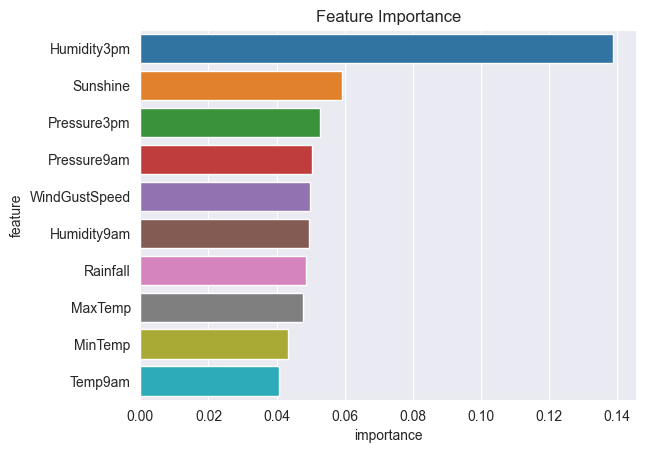

In [25]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');
plt.show()

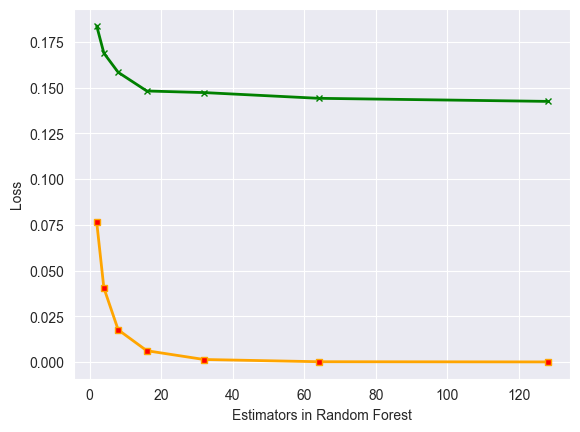

In [26]:
def estimators_len(min,max):
    est=[]
    loss=[]
    val_loss=[]
    for i in range(min,max+1,1):
        model=RandomForestClassifier(n_jobs=-1,random_state=42,n_estimators=2**i)
        model.fit(train_df,train_targets)
        est.append(2**i)
        loss.append(1-model.score(train_df,train_targets))
        val_loss.append(1-model.score(val_df,val_targets))
    plt.plot(est,loss,marker='s',color='orange',linewidth=2,markersize=4,mfc='r')
    plt.xlabel('Estimators in Random Forest')
    plt.ylabel('Loss')
    plt.plot(est,val_loss,marker='x',color='g',linewidth=2,markersize=4,mfc='lime')
    plt.show()

estimators_len(1,7) 

In [27]:
def test_model(**params):
        model=RandomForestClassifier(n_jobs=-1,random_state=42,**params)
        model.fit(train_df,train_targets)
        return model.score(train_df,train_targets),model.score(val_df,val_targets)

In [28]:
print(test_model(max_depth=5))
print(test_model(max_depth=10))
print(test_model(max_depth=50))

(0.8208469713500627, 0.82589518890372)
(0.8525073746312685, 0.8423190760838024)
(0.9999494888269285, 0.8565956705936975)


In [29]:
print(test_model(max_leaf_nodes=2**2))
print(test_model(max_leaf_nodes=2**5))
print(test_model(max_leaf_nodes=2**10))

(0.7749020083242413, 0.7882885497069235)
(0.8285347718915425, 0.8318727874180256)
(0.877894290216996, 0.8499216528350066)


In [30]:
test_model(max_depth=2**10,max_leaf_nodes=2**10)

(0.877894290216996, 0.8499216528350066)

In [31]:
test_model(max_features='log2')

(0.9999494888269285, 0.8565376356566653)

In [32]:
test_model(max_features=4)

(0.9999393865923142, 0.853868028553189)

In [33]:
test_model(min_samples_split=7,min_samples_leaf=3)

(0.928425667757708, 0.8547965875457025)

In [34]:
test_model(min_samples_split=100,min_samples_leaf=60)

(0.8493857841354507, 0.8451627879983751)

In [35]:
print(test_model(min_impurity_decrease=0.1))
print(test_model(min_impurity_decrease=1e-4))
print(test_model(min_impurity_decrease=1e-8))

(0.774891906089627, 0.7882885497069235)
(0.8348486685254778, 0.8349486390807266)
(0.9999595910615429, 0.8552608670419592)


In [36]:
print(test_model(max_samples=0.1))
print(test_model(max_samples=0.5))
print(test_model(max_samples=0.8))

(0.8752980159211218, 0.8523010852533225)
(0.9684608235341657, 0.8564796007196332)
(0.9988887541924274, 0.8585688584527886)


In [37]:
test_model(class_weight={'No':1,'Yes':2})

(0.9999393865923142, 0.85694388021589)

In [38]:
model=RandomForestClassifier(n_jobs=-1,
                             random_state=42,
                             n_estimators=50,
                             max_features='log2',
                             max_depth=30,
                             class_weight={'No':1,'Yes':2})

In [39]:
%%time
model.fit(train_df,train_targets)

Wall time: 2.3 s


RandomForestClassifier(class_weight={'No': 1, 'Yes': 2}, max_depth=30,
                       max_features='log2', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [40]:
model.score(train_df,train_targets),model.score(val_df,val_targets)

(0.9870085262860144, 0.8537519586791248)

In [41]:
model.score(test_df,test_targets)

0.8426888426888427

In [44]:
sample_test = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}
sample_df=pd.DataFrame([sample_test])
sample_df[numeric_cols] = imputer.transform(sample_df[numeric_cols]);
sample_df[numeric_cols] = scaler.transform(sample_df[numeric_cols]);
sample_df[encoded_cols] = encoder.transform(sample_df[categorical_cols]);
sample_df=sample_df[numeric_cols+encoded_cols]

C:\Users\balaji\anaconda3\envs\tf2.4\lib\site-packages\pandas\core\frame.py:3673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [45]:
prediction = model.predict(sample_df)
prediction

array(['Yes'], dtype=object)

In [47]:
prob = model.predict_proba(sample_df)[0]
prob

array([0.07479293, 0.92520707])

#### In the logistic regression model we got:-
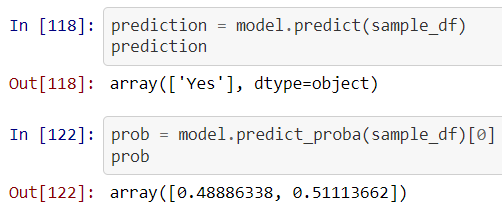
#### Our model wasnt very confident. But now we have 92% cahnces of rain . Thats the power of **`RandomForests`**.